<a href="https://colab.research.google.com/github/jessicatizziani/biblioteca_pandas---varejo/blob/main/DESAFIO_VAREJO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto loja de varejo

![image.png](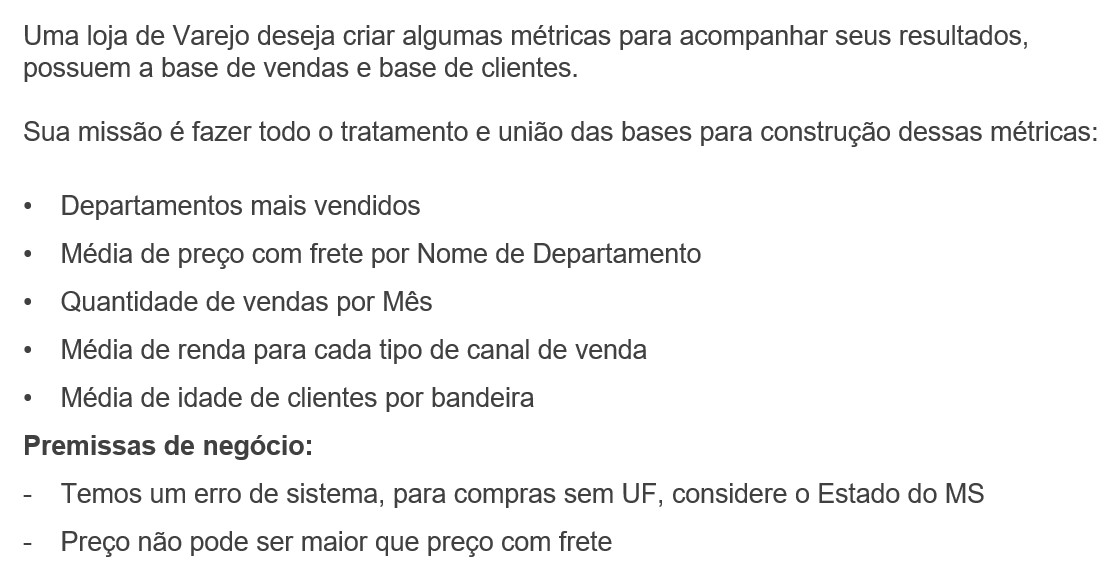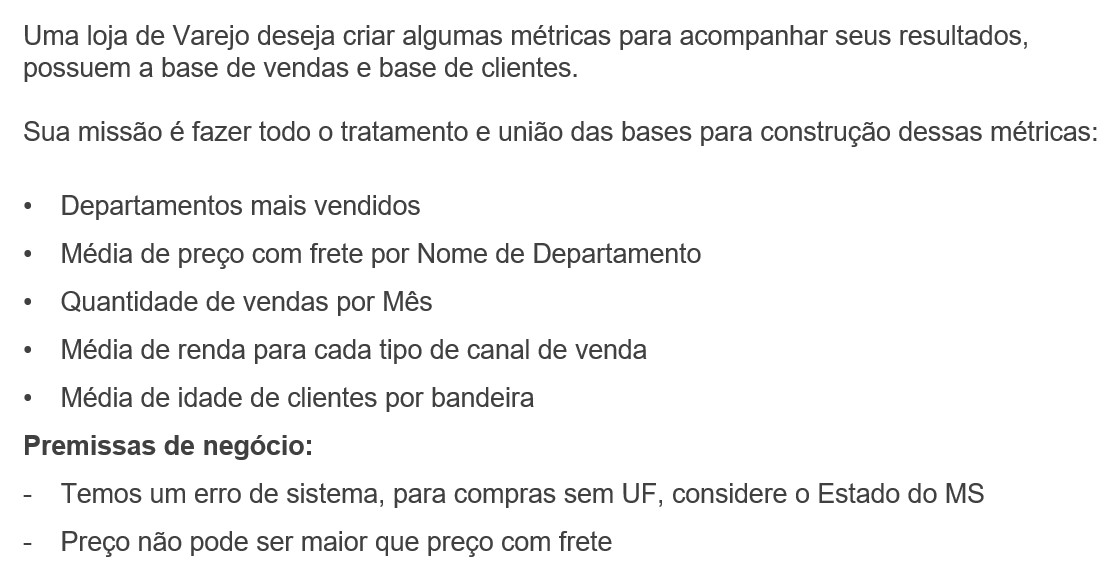)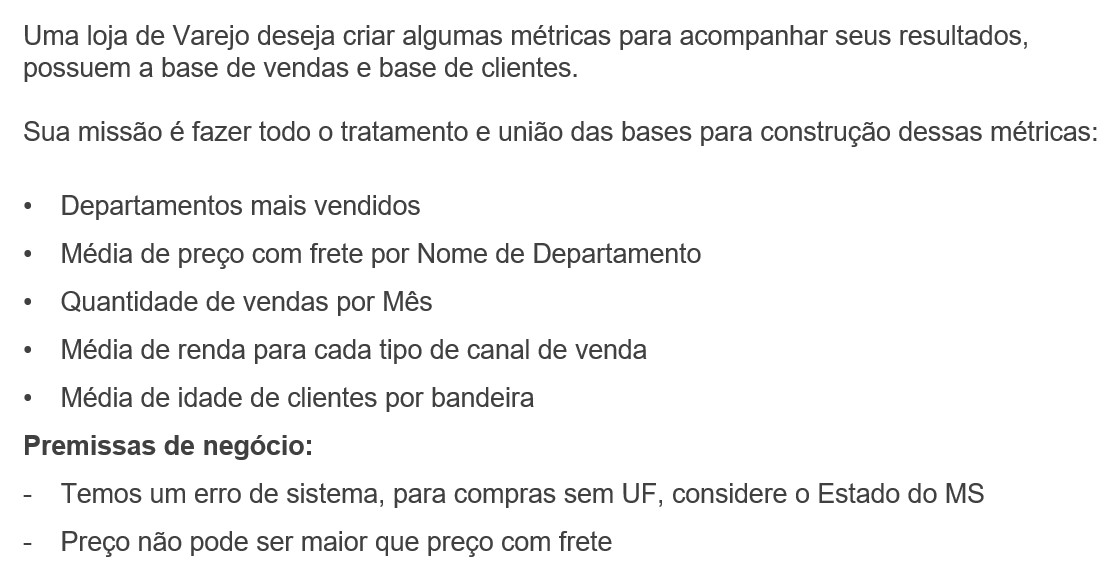

In [1]:
# importando biblotecas
import pandas as pd
import seaborn as sns

In [2]:
# importando base de dados
vendas = pd.read_excel('/content/varejo.xlsx')

In [3]:
# Visualização das primeiras linhas
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [4]:
# tipos de dados
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [5]:
# analisando as colunas para ver o que tem de informação nelas..
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [6]:
# CORRIGINDO A COLUNA...
# Observa-se acima, que , tenho um valor chamado "APP" e outro chamado "Aplicativo"
# como bem provável que sejam a mesma coisa, utilizamos a função "replace" para substituir os nomes

vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")

# Visualizando como ficou..

vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [7]:
# acima vemos que os valores de APP, foi incluído nos valores de Aplicativo

In [8]:
# analisando as colunas para ver o que tem de informação nelas..
vendas.groupby("bandeira").idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [9]:
# analisando as colunas para ver o que tem de informação nelas..
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [10]:
# CORRIGINDO AS COLUNAS...
# Observa-se acima que os dados estão separados por espaço.
# Vou então incluir um "_" no lugar dos espaços, como uma boa prática

vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")

# Visualizando como ficou..

vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [11]:
# analisando as colunas para ver o que tem de informação nelas..
vendas.groupby("estado").idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [12]:
# Tratamento de nulos da coluna 'estado'.

vendas[vendas["estado"].isnull()]


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [13]:
# posso dropar, no entanto a premissa de negócio, solicita substituição de nulos por MS (estado)
# função .fillna

vendas["estado"].fillna("MS", inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [14]:
# acima, ainda observo que a coluna "Preço" tem valores nulos
# Decido que irei substituir pela média de preços**

# atribuindo..
media_preco = vendas["Preço"].mean()

# alterando..
vendas["Preço"].fillna(media_preco, inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [15]:
vendas[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [16]:
# Lembrando que a premissa do negócio é que o Preço não seja > que Preço_com_frete
# Posso então excluir as linhas no qual Preço seja < que Preço_com_frete .. filtrando ..

preco_errado = vendas.query("Preço > Preço_com_frete")
preco_correto = vendas.query("Preço < Preço_com_frete")

In [17]:
preco_correto.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [18]:
# Filtrando alguns dados para observar seu comportamento

preco_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'")

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
115,67265,Internet,A,2023-01-19,207.2,229.024,Esporte_e_Lazer,SP,15386
272,40850,Aplicativo,B,2023-04-06,335.2,373.952,Esporte_e_Lazer,SP,21402
714,447850,Aplicativo,A,2023-01-11,1319.2,1348.400,Esporte_e_Lazer,SP,7498
1352,119890,Mobile,B,2023-03-09,167.2,197.576,Esporte_e_Lazer,SP,19997
1389,114150,Mobile,B,2023-03-07,1743.2,1761.056,Esporte_e_Lazer,SP,15256
...,...,...,...,...,...,...,...,...,...
69360,186900,Aplicativo,B,2023-04-12,479.2,511.760,Esporte_e_Lazer,SP,22412
69424,196585,Internet,B,2023-02-04,1159.2,1235.944,Esporte_e_Lazer,SP,7783
70680,135895,Internet,A,2023-03-23,1039.2,1053.528,Esporte_e_Lazer,SP,19827
71173,479520,Aplicativo,B,2023-03-25,1199.2,1230.040,Esporte_e_Lazer,SP,10609


## Métricas


In [19]:
# DEPARTAMENTOS MAIS VENDIDOS:

preco_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()


,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [20]:
# MÉDIA DE PREÇO COM FRETE POR DEPARTAMENTO
# round, 2 = duas casas decimais

round(preco_correto.groupby("Nome_Departamento"
      )["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(), 2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [22]:
# QUANTIDADE DE VENDAS POR MÊS

preco_correto.groupby("Data").idcompra.nunique().sort_values(ascending=False)

Data
2023-02-13    226
2023-01-20    218
2023-03-07    215
2023-03-30    214
2023-02-20    214
             ... 
2023-02-15    162
2023-04-04    162
2023-02-25    161
2023-02-22    156
2023-02-12    152
Name: idcompra, Length: 119, dtype: int64

In [24]:
# Acima ele me retorna a data completa, fazer um filtro somente do mês, criando uma nova coluna

preco_correto["mês"] = preco_correto["Data"].dt.month
preco_correto.head()

<ipython-input-24-6732ed017e08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preco_correto["mês"] = preco_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [25]:
# .. resultado

preco_correto.groupby("mês").idcompra.nunique().sort_values(ascending=False)

mês
3    5590
4    5454
1    5309
2    5138
Name: idcompra, dtype: int64

In [ ]:
# Para responder as métricas abaixo, vamos precisar de uma segunda base de dados;
# Usarei a função join para isso.

In [26]:
cliente = pd.read_excel("/content/cliente_varejo.xlsx")
cliente.head()

# Observa-se abaixo que temos em comum nas tuas tabelas, a coluna 'cliente_log'.

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [27]:
cliente.describe()

,cliente_Log,idade,renda
count,26425.000000,26425.000000,26425.000000
mean,13937.414456,53.412564,8241.470350
std,8066.941892,20.698825,3899.871482
min,1.000000,18.000000,1500.000000
25%,6920.000000,35.000000,4859.000000
50%,13946.000000,53.000000,8234.000000
75%,20926.000000,71.000000,11629.000000
max,27982.000000,89.000000,15000.000000


In [28]:
# validando os dados

cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [29]:
# acima, não temos dados nulos..
# Podemos transformar a renda em float, para melhor análise

cliente = cliente.astype({'renda': 'float'})
cliente.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [30]:
# Abaixo, estou unindo as duas yabelas, usando o método .merge()
# utilizando a coluna on='cliente_log', onde how = left, ou seja: a esquerda
vendas_cliente = preco_correto.merge(cliente, how="left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [31]:
# agora meu DF unido é o vendas_cliente

In [32]:
# MÉDIA DE RENDA PARA CADA TIPO DE CANAL DE VENDA:
agg_idcanal_venda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean"
  ).sort_values(ascending=False).reset_index(), 2)
agg_idcanal_venda.head()

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [33]:
# MÉDIA DE IDADE DE CLIENTES POR BANDEIRA:
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean"
  ).sort_values(ascending=False).reset_index(), 2)
agg_idade_bandeira.head()

,bandeira,idade
0,A,53.30
1,B,53.29


## Visualização dos Dados

In [34]:
import matplotlib.pyplot as plt

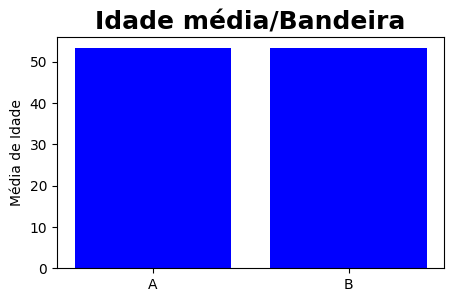

In [35]:
# PARA MÉDIA DE IDADE POR BANDEIRA

#Configurando tamanho do gráfico
fig = plt.figure(figsize=(5, 3))

# configurando eixo "x" e eixo "y", na coloração azul
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="blue")

# configurando o título do eixo y
plt.ylabel("Média de Idade")

# Configurando um título = loc(localização), fontsize(tamanho da letra), fontweight(estilo: itálico, negrito)
plt.title("Idade média/Bandeira", loc="center", fontsize=18, fontweight="bold", color="black");

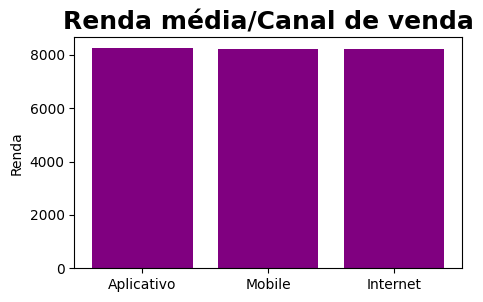

In [36]:
# PARA MÉDIA DE RENDA PARA CADA TIPO DE CANAL DE VENDA

#Configurando tamanho do gráfico
fig = plt.figure(figsize=(5, 3))

# configurando eixo "x" e eixo "y", na coloração azul
plt.bar(agg_idcanal_venda["idcanalvenda"], agg_idcanal_venda["renda"], color="purple")

# configurando o título do eixo y
plt.ylabel("Renda")

# Configurando um título = loc(localização), fontsize(tamanho da letra), fontweight(estilo: itálico, negrito)
plt.title("Renda média/Canal de venda", loc="center", fontsize=18, fontweight="bold", color="black");

In [39]:
# QUANTIDADE DE VENDAS POR MÊS

venda_por_data = preco_correto.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


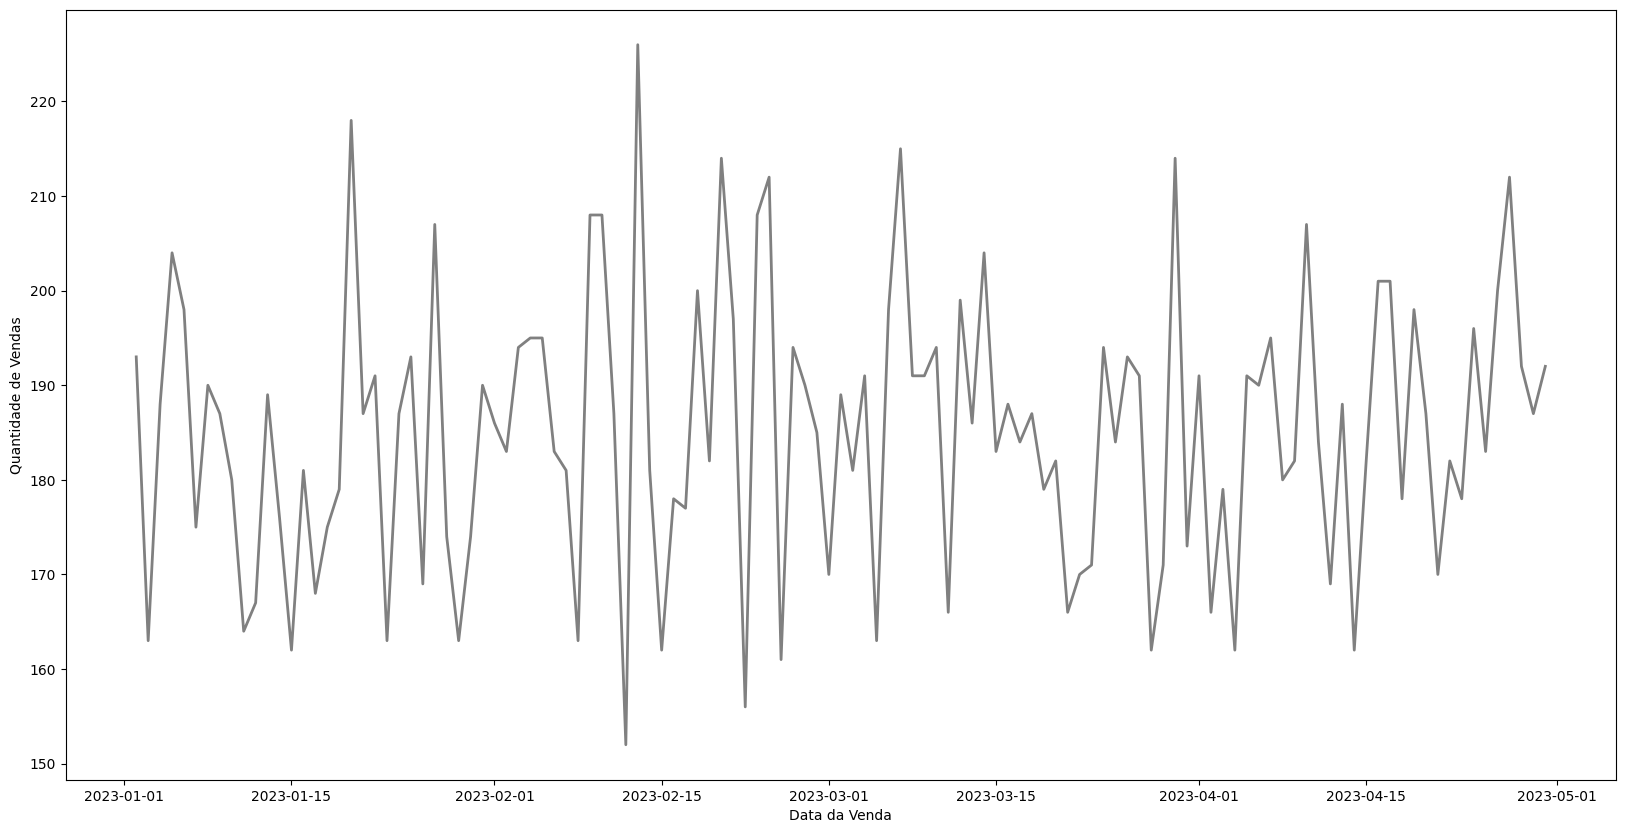

In [53]:
# Quando tenho variável de data, faz mais sentido plotar um gráfico de linha

#Configurando tamanho do gráfico
fig = plt.figure(figsize=(20, 10))

# configurando o título do eixo y
plt.xlabel("Data da Venda")
plt.ylabel("Quantidade de Vendas")
x = venda_por_data["Data"]
y = venda_por_data["idcompra"]

# Configurando um título = loc(localização), fontsize(tamanho da letra), fontweight(estilo: itálico, negrito)
plt.plot(x,y, color="grey", linewidth=2)
plt.show()

In [54]:
# MÉDIA DE PREÇO COM FRETE POR DEPARTAMENTO:

agg_dep_preco = round(preco_correto.groupby("Nome_Departamento"
      )["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(), 2)
agg_dep_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


<ipython-input-63-2b04fdb0912a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(agg_dep_preco["Nome_Departamento"])


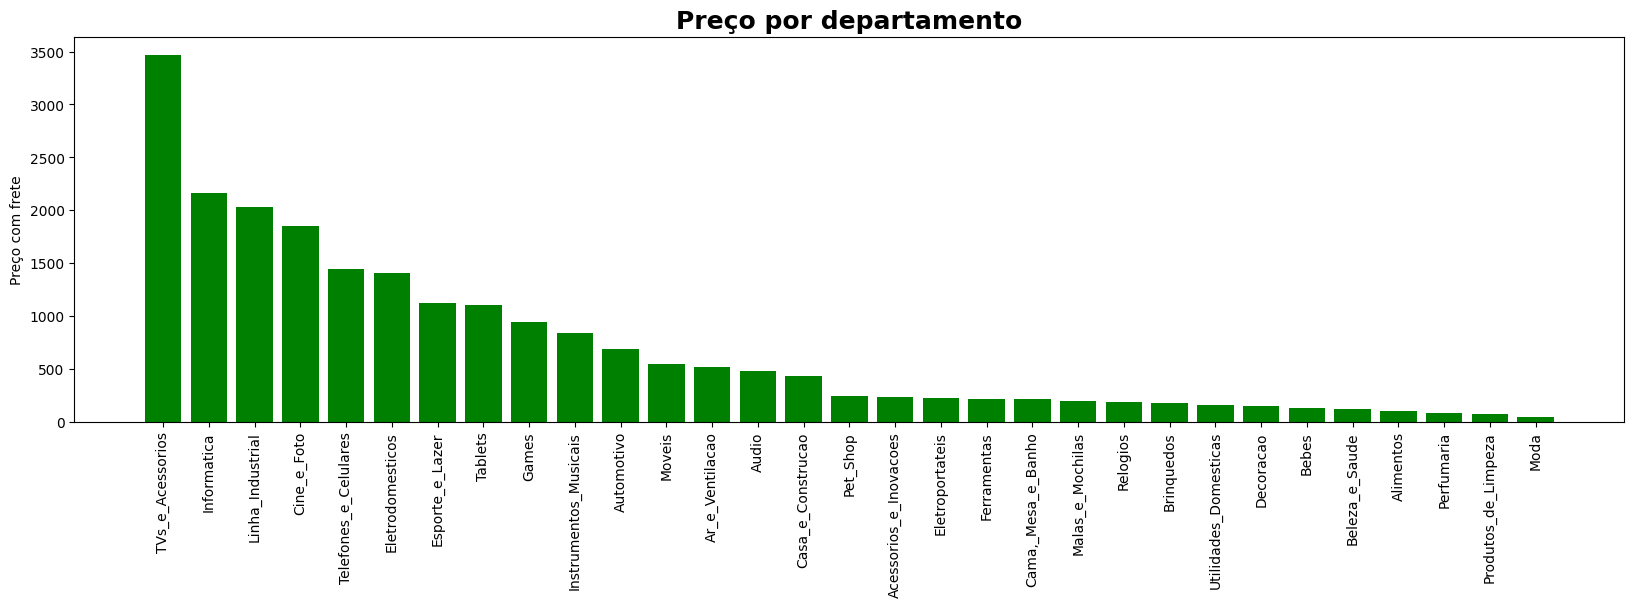

In [63]:
#Configurando tamanho do gráfico
fig = plt.figure(figsize=(20, 5))

# configurando eixo "x" e eixo "y", na coloração azul
plt.bar(agg_dep_preco["Nome_Departamento"], agg_dep_preco["Preço_com_frete"], color="green")

# configurando o título do eixo y
plt.ylabel("Preço com frete")

# Configurando um título = loc(localização), fontsize(tamanho da letra), fontweight(estilo: itálico, negrito)
plt.title("Preço por departamento", loc="center", fontsize=18, fontweight="bold", color="black");

# rotacionando as legendas do eixo x em 90 graus
plt.xticks(rotation=90)
plt.gca().set_xticklabels(agg_dep_preco["Nome_Departamento"])

plt.show()